## Python Week 7 CS

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import os

In [3]:
os.chdir('D:/Data analysis/DataScience Academy/Python course/Week 7')

In [4]:
data=pd.read_csv('./Country-data (1).csv')

df=data.copy()

df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [78]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [79]:
features = [col for col in df.columns if df[col].dtype!='object']

features

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

<AxesSubplot:>

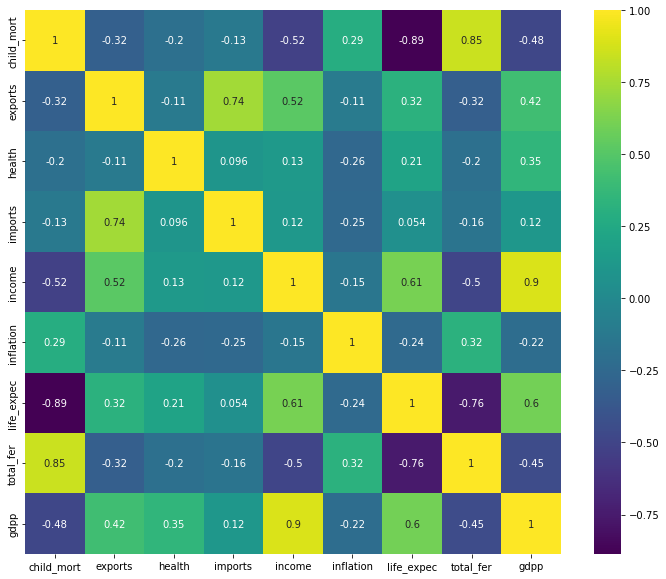

In [46]:
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(), annot=True, cmap = 'viridis')

## K-Means

In [49]:
X = df[features]

scaler = StandardScaler()

In [50]:
from sklearn.pipeline import Pipeline

In [54]:
for x in [2,3,4,5]:
    model = KMeans(n_clusters=x, max_iter=100)
    pipeline = Pipeline(steps=[('scaler', scaler), ('cluster_model', model)])

In [55]:
pipeline.fit(X)
clusters = pipeline.predict(X)

<AxesSubplot:ylabel='gdpp'>

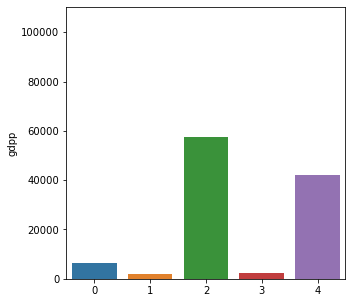

In [60]:
plt.figure(figsize=(5,5))

sns.barplot(data=X, x=clusters, y='gdpp', errwidth=0 )

In [61]:
final_model = KMeans(n_clusters=3, max_iter=500)
pipeline = Pipeline(steps=[('scaler', scaler), ('model', final_model)])

pipeline.fit(X)
X['Clusters'] = pipeline.predict(X)

In [64]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [63]:
X['Clusters'].value_counts()

2    84
1    47
0    36
Name: Clusters, dtype: int64

In [67]:
X.groupby('Clusters')['gdpp'].mean()

Clusters
0    42494.444444
1     1922.382979
2     6486.452381
Name: gdpp, dtype: float64

In [70]:
country_status = {0:'Developed', 1:'Developing', 2:'Under_Developed'}

X['Country_Status'] = X['Clusters'].map(country_status)

In [93]:
df_final = pd.merge(df,X['Country_Status'],left_index=True, right_index=True)

df_final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country_Status
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Under_Developed
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Under_Developed
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Under_Developed
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Under_Developed
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Under_Developed
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Developed
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Developed
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Under_Developed


In [96]:
df_final[df_final['country']=='Azerbaijan']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country_Status
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.8,69.1,1.92,5840,Under_Developed


## PCA

In [97]:
data=pd.read_csv('./Country-data (1).csv')

df=data.copy()

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


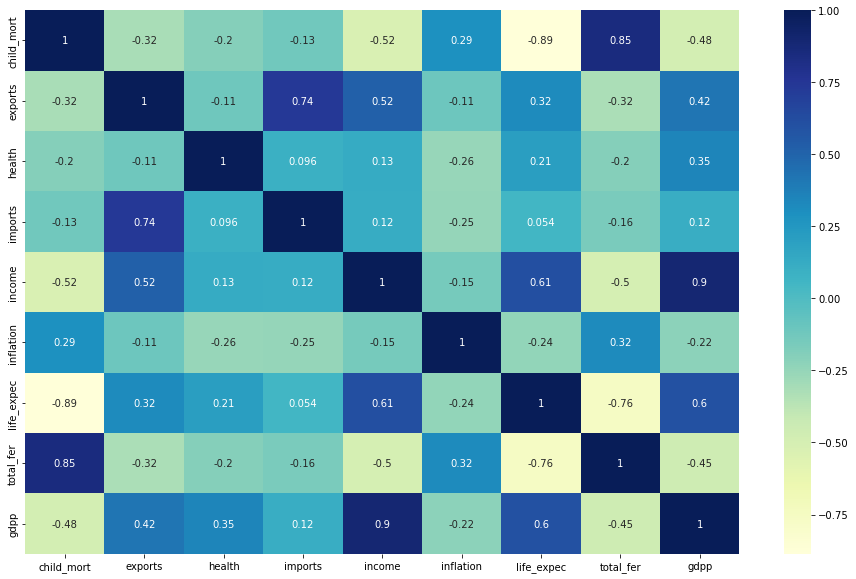

In [107]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

plt.savefig('corrplot')

plt.show()

C:\Users\KompoTexnikiSer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KompoTexnikiSer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KompoTexnikiSer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

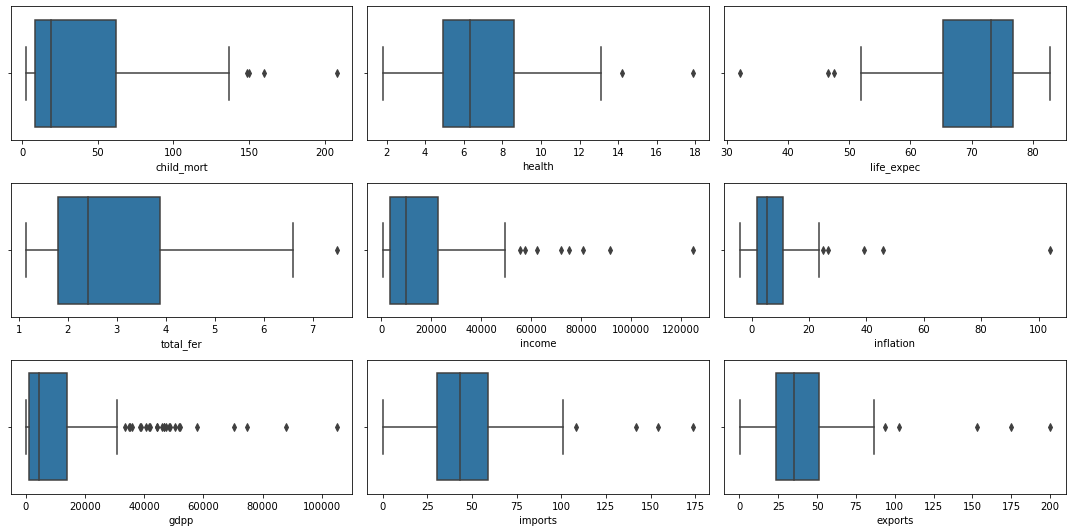

In [99]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])

plt.tight_layout()

In [13]:
data_help = data.copy()
data_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [102]:
percentiles = data_help['child_mort'].quantile([0.05,0.95]).values
data_help['child_mort'][data_help['child_mort'] <= percentiles[0]] = percentiles[0]
data_help['child_mort'][data_help['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['health'].quantile([0.05,0.95]).values
data_help['health'][data_help['health'] <= percentiles[0]] = percentiles[0]
data_help['health'][data_help['health'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['life_expec'].quantile([0.05,0.95]).values
data_help['life_expec'][data_help['life_expec'] <= percentiles[0]] = percentiles[0]
data_help['life_expec'][data_help['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['total_fer'].quantile([0.05,0.95]).values
data_help['total_fer'][data_help['total_fer'] <= percentiles[0]] = percentiles[0]
data_help['total_fer'][data_help['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['income'].quantile([0.05,0.95]).values
data_help['income'][data_help['income'] <= percentiles[0]] = percentiles[0]
data_help['income'][data_help['income'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['inflation'].quantile([0.05,0.95]).values
data_help['inflation'][data_help['inflation'] <= percentiles[0]] = percentiles[0]
data_help['inflation'][data_help['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['gdpp'].quantile([0.05,0.95]).values
data_help['gdpp'][data_help['gdpp'] <= percentiles[0]] = percentiles[0]
data_help['gdpp'][data_help['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['imports'].quantile([0.05,0.95]).values
data_help['imports'][data_help['imports'] <= percentiles[0]] = percentiles[0]
data_help['imports'][data_help['imports'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['exports'].quantile([0.05,0.95]).values
data_help['exports'][data_help['exports'] <= percentiles[0]] = percentiles[0]
data_help['exports'][data_help['exports'] >= percentiles[1]] = percentiles[1]

C:\Users\KompoTexnikiSer\AppData\Local\Temp\ipykernel_10600\221435302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_help['child_mort'][data_help['child_mort'] <= percentiles[0]] = percentiles[0]
C:\Users\KompoTexnikiSer\AppData\Local\Temp\ipykernel_10600\221435302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_help['child_mort'][data_help['child_mort'] >= percentiles[1]] = percentiles[1]
C:\Users\KompoTexnikiSer\AppData\Local\Temp\ipykernel_10600\221435302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

C:\Users\KompoTexnikiSer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KompoTexnikiSer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KompoTexnikiSer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

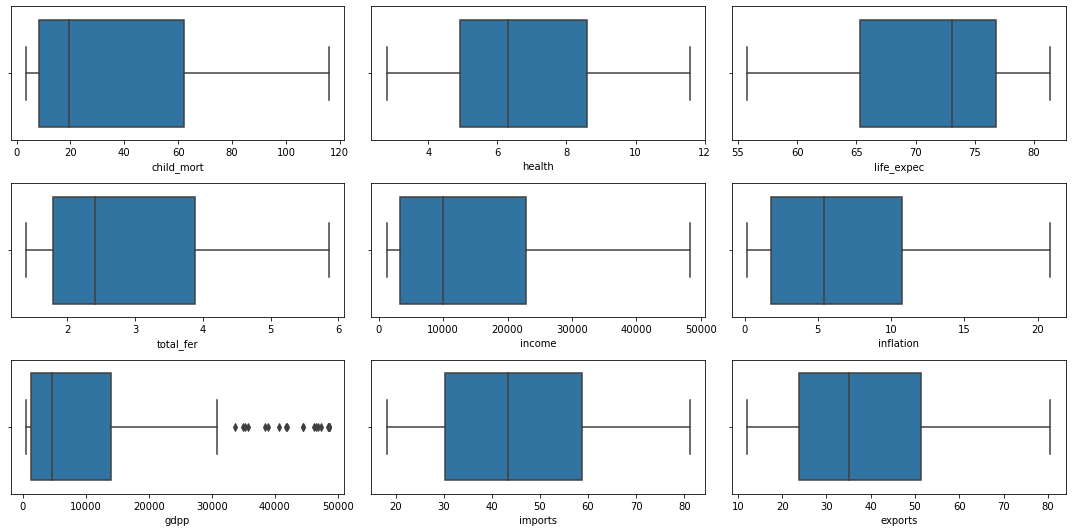

In [103]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(data_help['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data_help['health'], ax = axs[0,1])
plt3 = sns.boxplot(data_help['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data_help['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data_help['income'], ax = axs[1,1])
plt6 = sns.boxplot(data_help['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data_help['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data_help['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data_help['exports'], ax = axs[2,2])

plt.tight_layout()

In [14]:
scaler = StandardScaler()


varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

data_help[varlist] = scaler.fit_transform(data_help[varlist])

In [15]:
pca = PCA(svd_solver='randomized', random_state=42)

In [16]:
X = data_help.drop(['country'],axis=1)

y = data_help['country']

In [17]:
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

In [113]:
pca.components_

array([[-0.        ,  0.26472375,  0.2144918 ,  0.11294236,  0.46435592,
        -0.2594214 ,  0.45462131, -0.41962569,  0.45328412],
       [-0.        , -0.59576877,  0.20862149, -0.72398026,  0.12341868,
         0.06603521,  0.13255922, -0.00823826,  0.2003911 ],
       [ 0.        ,  0.31463862, -0.62100253, -0.29274656,  0.25143015,
         0.58373505,  0.11899754, -0.04729791,  0.09641893],
       [ 0.        ,  0.19575885,  0.46548342,  0.09214115,  0.28716023,
         0.35999717, -0.32367247,  0.5312598 ,  0.37074771],
       [ 0.        , -0.04456163,  0.46184337,  0.16566491, -0.19008192,
         0.64570573,  0.24027014, -0.40573038, -0.28610522],
       [-0.        ,  0.56108403,  0.26852781, -0.54025032, -0.06774973,
        -0.16537712, -0.39738861, -0.29092091, -0.21613611],
       [-0.        , -0.32934303, -0.14289418,  0.21891607,  0.22454438,
         0.09682186, -0.66419383, -0.52819346,  0.20797536],
       [-0.        , -0.11132858,  0.04823021,  0.0408235 ,  0

In [18]:
cols = list(X.columns)

pcs_df = pd.DataFrame({'PC1':pca.components_[0], 'PC2':pca.components_[1], 'Features':cols})

In [19]:
pcs_df.head()

,PC1,PC2,Features
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income


In [20]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

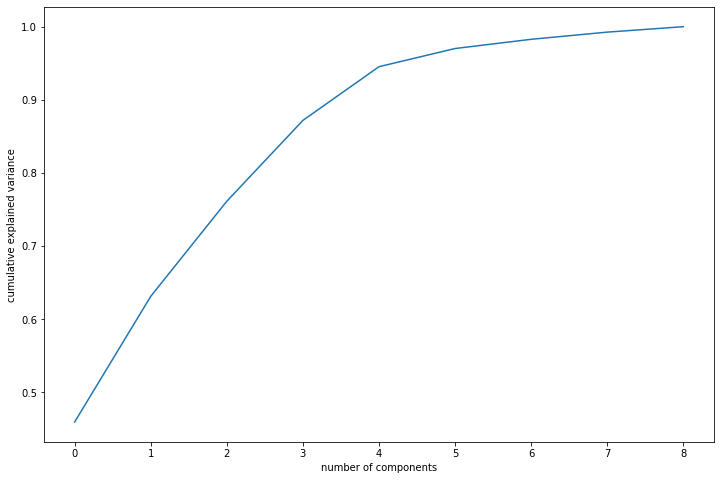

In [21]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [118]:
## As we see from the diagram four components will be enough for our modeling

In [22]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [23]:
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 4)

In [24]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [25]:
corrmat = np.corrcoef(df_pca.transpose())

<AxesSubplot:>

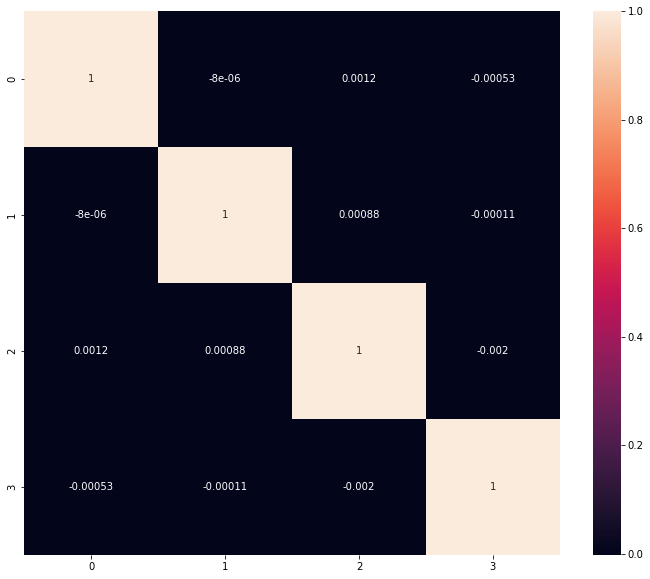

In [30]:
plt.figure(figsize = (12,8))
sns.heatmap(corrmat,annot = True)

In [124]:
# If the value is between {0.01, ...,0.3}, the data is regularly spaced.

# If the value is around 0.5, it is random.

# If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [125]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [127]:
hopkins(df_pca) ## high tendency to cluster

0.6954818696575495

## Hierarchical Clustering

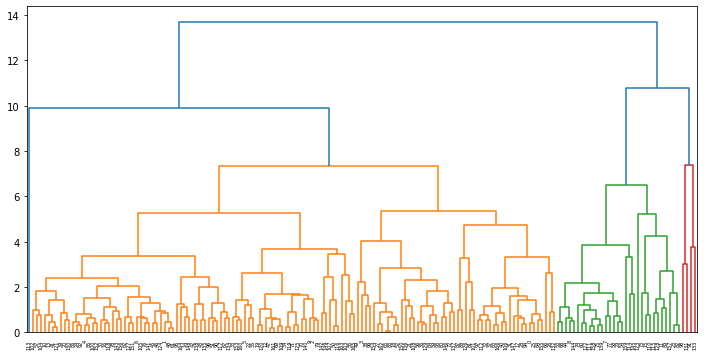

In [29]:
plt.figure(figsize = (12,6))

mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [132]:
from scipy.cluster.hierarchy import cut_tree

In [133]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.865437,-0.428359,-1.025497,1.142787,0
1,0.219470,-0.137446,-0.420393,-1.297630,1
2,-0.680914,-0.381664,1.727979,-0.551700,1
3,-2.652166,1.248850,2.131486,1.411771,2
4,1.016473,0.704701,-0.327208,-0.781915,3


In [140]:
pca_cluster_hc = pd.concat([data_help['country'],df_pca_hc], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

C:\Users\KompoTexnikiSer\AppData\Local\Temp\ipykernel_10600\882585123.py:1: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  pca_cluster_hc = pd.concat([data_help['country'],df_pca_hc], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)


,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.865437,-0.428359,-1.025497,1.142787,0
1,Albania,0.219470,-0.137446,-0.420393,-1.297630,1
2,Algeria,-0.680914,-0.381664,1.727979,-0.551700,1
3,Angola,-2.652166,1.248850,2.131486,1.411771,2
4,Antigua and Barbuda,1.016473,0.704701,-0.327208,-0.781915,3


In [141]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,3,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [142]:
hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [143]:
df = pd.concat([pd.Series(list(range(0,5))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,86.900000,26.857273,7.294773,45.977273,3035.295455,10.511023,59.411364,4.875455,1518.181818
1,1,27.153846,28.338058,5.974231,34.366652,10866.153846,9.074327,72.421154,2.415577,6055.923077
2,2,83.480000,66.120000,3.928000,54.880000,11164.000000,25.220000,63.160000,4.788000,5444.000000
3,3,13.978723,69.317021,6.136809,66.906383,29158.510638,4.430596,75.527660,1.995957,19776.297872
4,4,4.268421,32.705263,10.448421,31.663158,38857.894737,1.625158,80.905263,1.812105,43505.263158


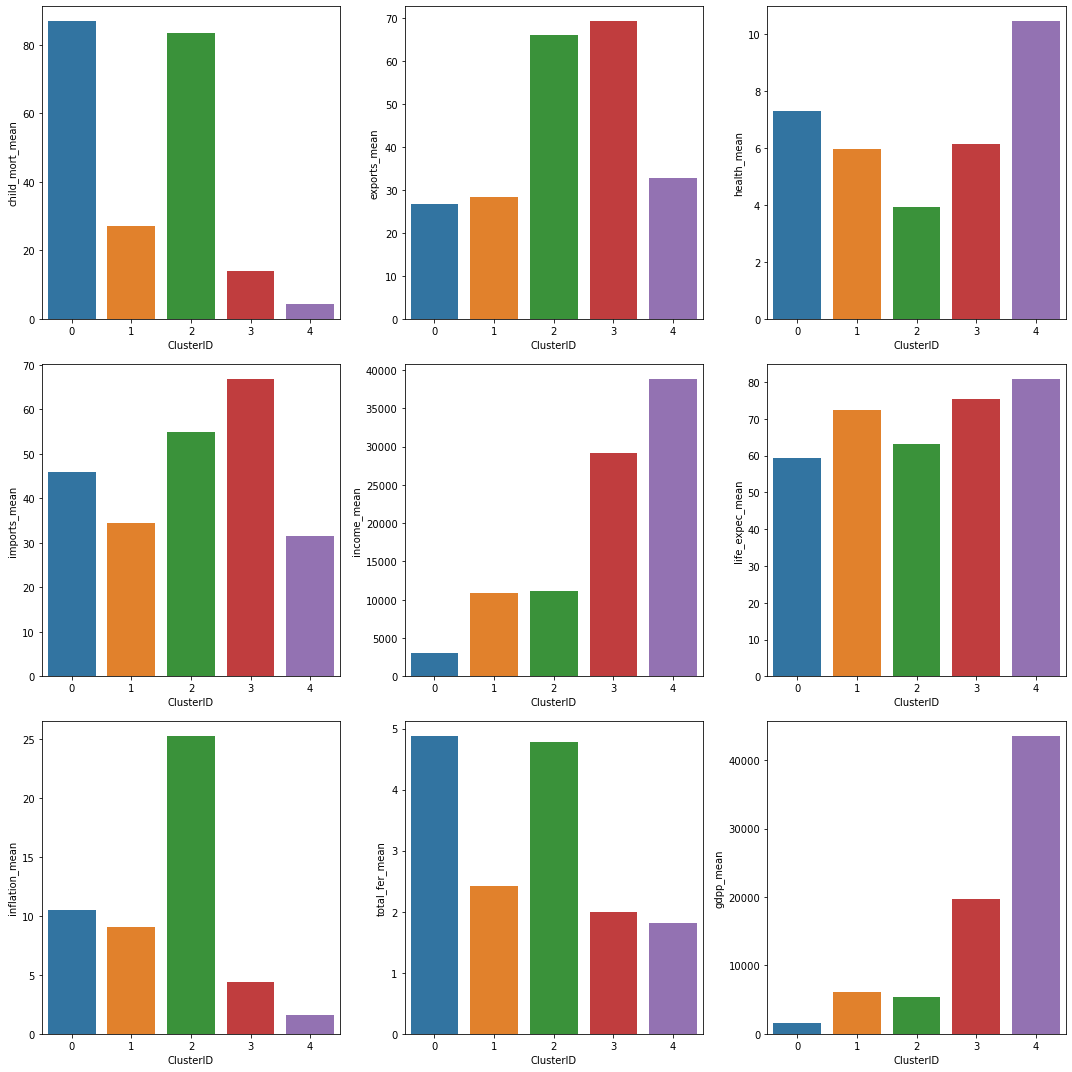

In [144]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [146]:
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

array(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Iraq', 'Jordan', 'Kenya', 'Kiribati',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania',
       'Timor-Leste', 'Togo', 'Uganda', 'Vanuatu', 'Yemen', 'Zambia'],
      dtype=object)